In [ ]:
#install yahoo finance package
%pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 678 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
#import data from yahoo finance
import yfinance as yf
df = yf.download('MSFT')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060809,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062980,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064067,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062437,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061351,47894400
...,...,...,...,...,...,...
2022-11-21,241.429993,244.669998,241.190002,242.050003,242.050003,26394700
2022-11-22,243.589996,245.309998,240.710007,245.029999,245.029999,19665700
2022-11-23,245.110001,248.279999,244.270004,247.580002,247.580002,19508500


In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


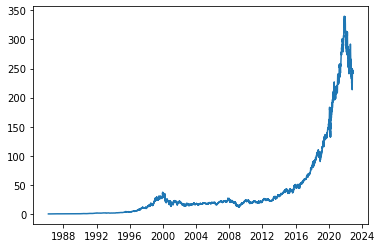

In [ ]:
#plot current graph
plt.plot(df.index, df['Adj Close'])
plt.show()

In [ ]:
#train test split

# 90% of data as training data
to_row = int(len(df)*0.9)

training_data = list(df[0:to_row]['Adj Close']) #beginning to 90% of data

# 10% as testing data
testing_data = list(df[to_row:]['Adj Close']) #from last 10% of the data at the end

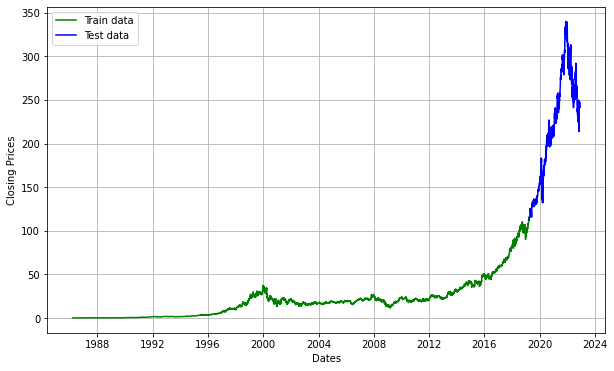

In [ ]:
#training set and testing set graph
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label="Train data")
plt.plot(df[to_row:]['Adj Close'], 'blue', label="Test data")
plt.legend()

In [ ]:
model_predictions = []
model_predictions_op = []
n_test_obser = len(testing_data)

In [ ]:
#Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Adj Close'])
print('ADF Statsictic: %f' % result[0])
print('p-value %f' % result[1]) #if < 0.05 then stationary
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key,value))

ADF Statsictic: 2.269464
p-value 0.998935
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


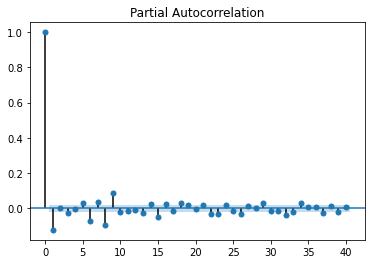

In [ ]:
#finding p order of AR
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
data = pd.DataFrame(df['Adj Close'])

plot_pacf
x=plot_pacf(data.diff().dropna()) #p, 1st and 2nd lag comparison from limit

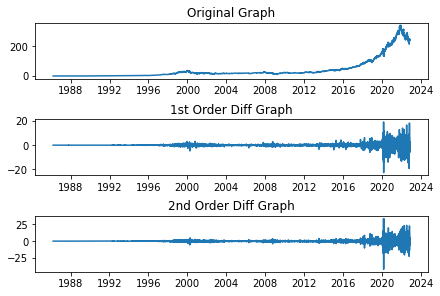

In [ ]:
from matplotlib.colorbar import constrained_layout
#finding d
fig, (ax1, ax2, ax3) = plt.subplots(3, constrained_layout = True)
ax1.plot(data); ax1.set_title('Original Graph')
ax2.plot(data.diff()); ax2.set_title('1st Order Diff Graph')
ax3.plot(data.diff().diff()); ax3.set_title('2nd Order Diff Graph')
plt.show()

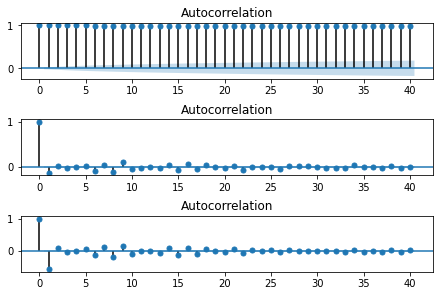

In [ ]:
#find value of d number of differencing for stationarity
fig, (ax1, ax2, ax3) = plt.subplots(3, constrained_layout = True)
x=plot_acf(data, ax = ax1)
y=plot_acf(data.diff().dropna(), ax = ax2)
z=plot_acf(data.diff().diff().dropna(), ax = ax3)
#check difference between 1st and 2nd order diff(),
# if 2nd immediate on 2nd order goes negative, then it's an over difference

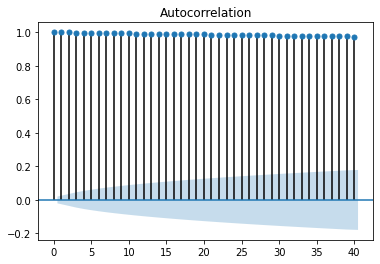

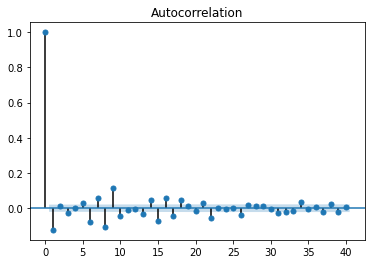

In [ ]:
#q finding differential order of Moving Average 
x=plot_acf(data.dropna())
y=plot_acf(data.diff().dropna()) #q = # of lags out of limit

In [ ]:
#ARIMA Training

for i in range(n_test_obser):
  model = ARIMA(training_data, order = (1,1,4)) #p,d,q
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0] #prediction of first value
  model_predictions.append(yhat)
  actual_test_value = testing_data[i] #actual data
  training_data.append(actual_test_value) #update training data
  #break

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
#summary

print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 9252
Model:                 ARIMA(1, 1, 4)   Log Likelihood              -16435.019
Method:                       css-mle   S.D. of innovations              1.430
Date:                Tue, 29 Nov 2022   AIC                          32884.038
Time:                        04:59:06   BIC                          32933.966
Sample:                             1   HQIC                         32901.004
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0267      0.013      2.129      0.033       0.002       0.051
ar.L1.D.y     -0.8313      0.027    -30.525      0.000      -0.885      -0.778
ma.L1.D.y      0.7173      0.029     25.052      0.0

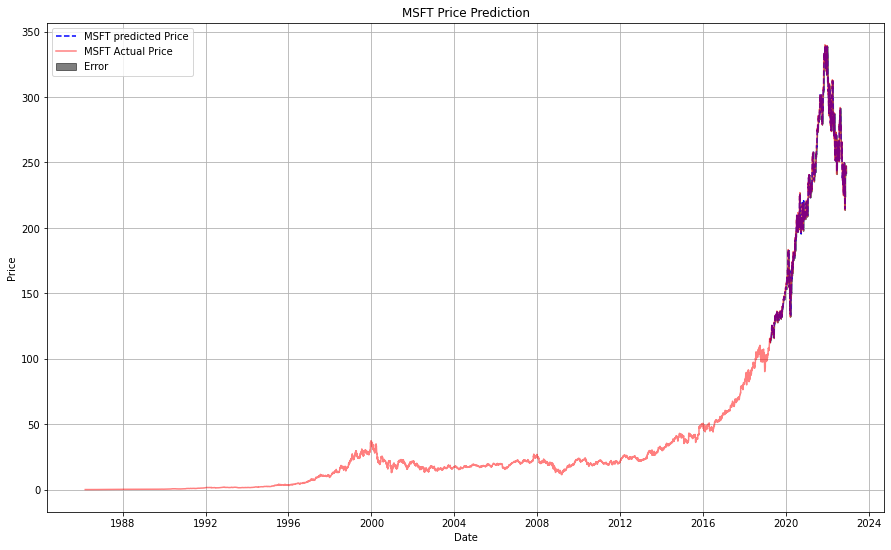

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions, color='blue', linestyle='dashed', label='MSFT predicted Price')
plt.plot(date_range, testing_data, color='red', label='MSFT Actual Price', alpha=0.5)
plt.plot(df[0:to_row]['Adj Close'], color='red', alpha=0.5)
plt.fill_between(date_range, df[to_row:]['Adj Close'], model_predictions, color='k', alpha=.5, label='Error')

plt.title('MSFT Price Prediction')
plt.xlabel("Date")
plt.ylabel('Price')
plt.legend()
plt.show()

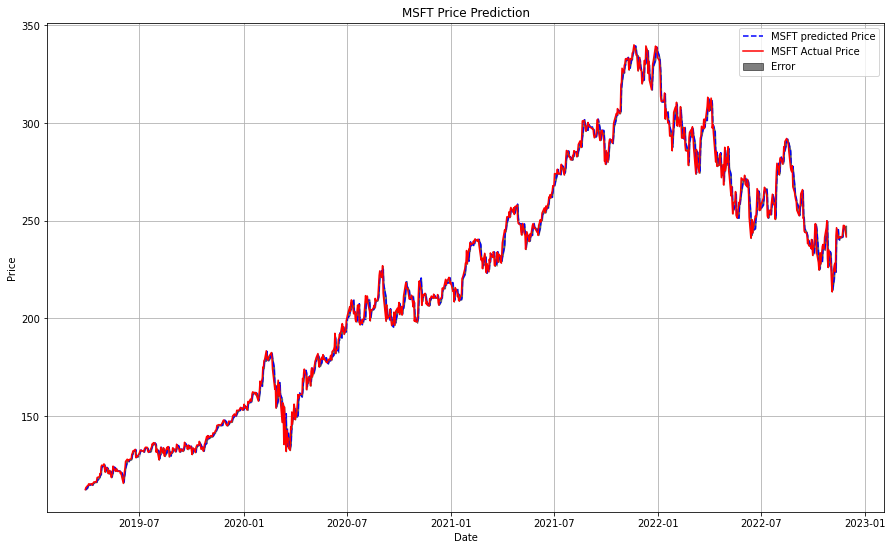

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions, color='blue', linestyle='dashed', label='MSFT predicted Price')
plt.plot(date_range, testing_data, color='red', label='MSFT Actual Price')
plt.fill_between(date_range, df[to_row:]['Adj Close'], model_predictions, color='k', alpha=0.5, label='Error')

plt.title('MSFT Price Prediction')
plt.xlabel("Date")
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
len(date_range)
#print(to_row)
#len(df['Adj Close'])

926

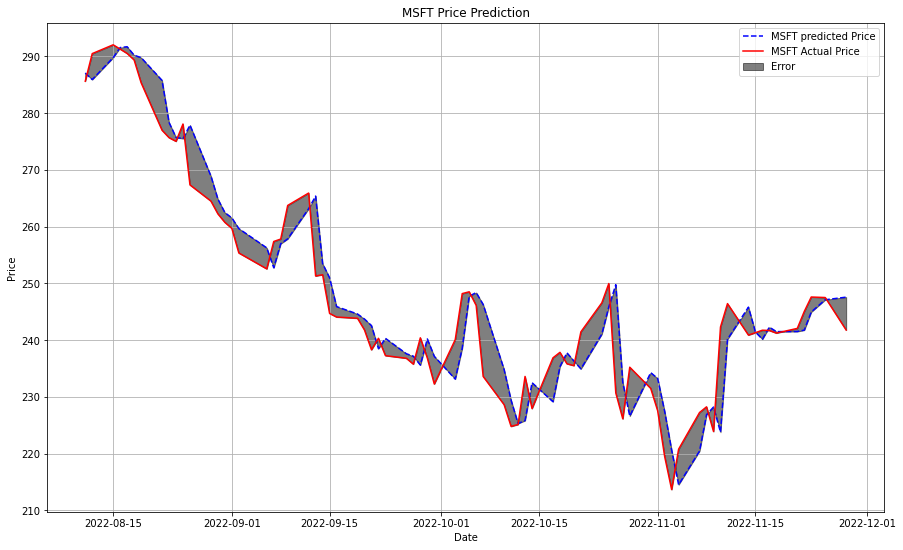

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range[850:], model_predictions[850:], color='blue', linestyle='dashed', label='MSFT predicted Price')
plt.plot(date_range[850:], testing_data[850:], color='red', label='MSFT Actual Price')
plt.fill_between(date_range[850:], df[to_row+850:]['Adj Close'], model_predictions[850:], color='k', alpha=0.5, label='Error')

plt.title('MSFT Price Prediction')
plt.xlabel("Date")
plt.ylabel('Price')
plt.legend()
plt.show()

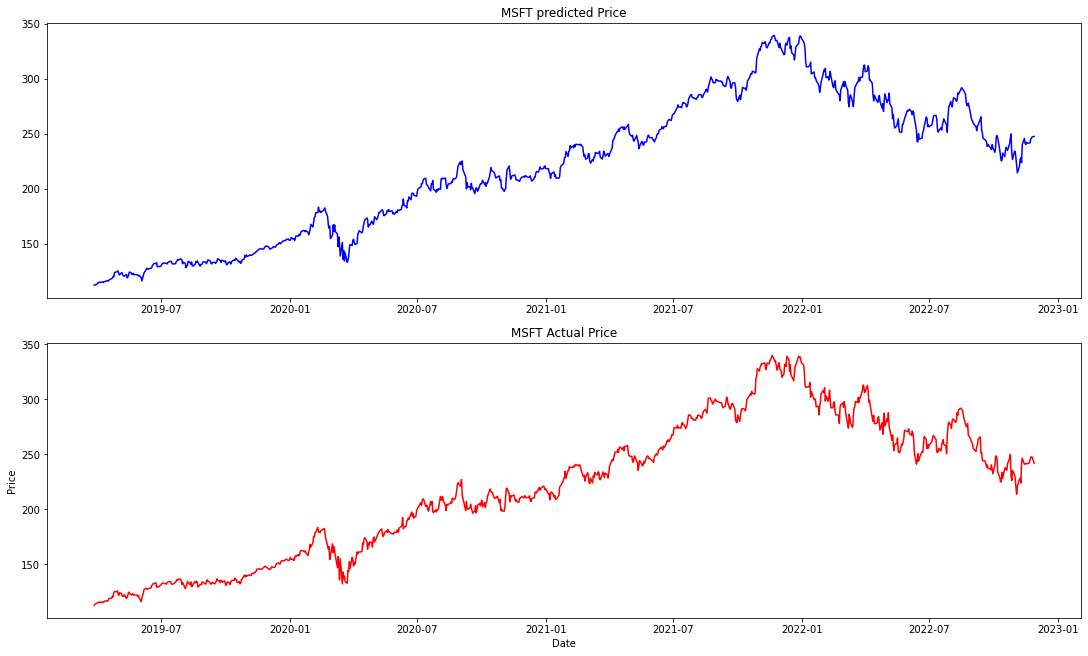

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, constrained_layout = True, figsize=(15,9))

ax1.plot(date_range, model_predictions, color='blue')
ax1.set_title('MSFT predicted Price')
#ax1.plot(date_range[925], model_predictions[925], color='red', marker = 'o')
ax2.plot(date_range, testing_data, color='red')
ax2.set_title('MSFT Actual Price')

plt.xlabel("Date")
plt.ylabel('Price')
plt.show()

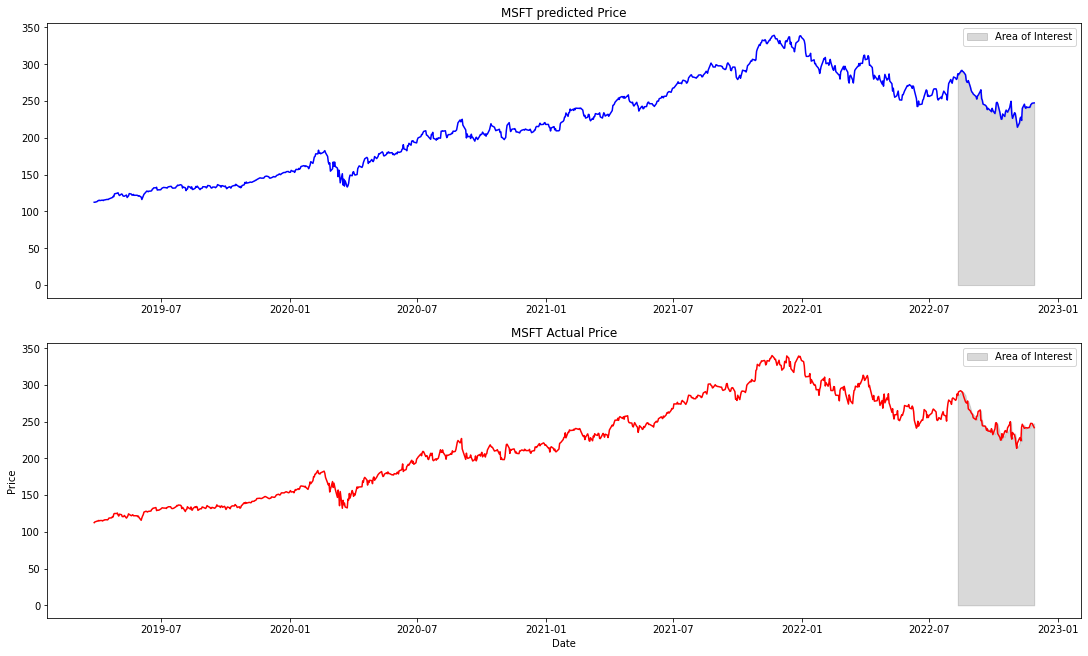

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, constrained_layout = True, figsize=(15,9))

ax1.plot(date_range, model_predictions, color='blue')
ax1.set_title('MSFT predicted Price')
ax1.fill_between(date_range[850:], model_predictions[850:], color='k', alpha=0.15, label='Area of Interest')
ax2.plot(date_range, testing_data, color='red')
ax2.fill_between(date_range[850:], model_predictions[850:], color='k', alpha=0.15, label='Area of Interest')
ax2.set_title('MSFT Actual Price')

plt.xlabel("Date")
plt.ylabel('Price')
ax1.legend()
ax2.legend()
plt.show()

In [ ]:
#performance

#mean absolute precentage error
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+str(mape))

MAPE: 0.014074382271267652
